In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas  as pd
import numpy   as np
import seaborn as sns
import re
import os

In [ ]:
df_items = pd.read_csv('20191002-items.csv')
df_reviews = pd.read_csv('20191002-reviews.csv')

In [ ]:
print('shape : {}'.format(df_items.shape))
df_items.head(4)

shape : (10942, 9)


,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02


In [ ]:
df_items.describe()

,itemId,price,averageRating,totalReviews
count,1.094200e+04,1.094200e+04,10942.000000,10942.000000
mean,2.936823e+08,3.020219e+06,4.171632,27.369494
std,2.090568e+08,6.681453e+06,1.032055,260.253817
min,6.068000e+03,1.000000e+03,1.000000,1.000000
25%,1.082924e+08,7.920000e+04,4.000000,1.000000
50%,3.540792e+08,1.095000e+06,4.000000,2.000000
75%,4.527141e+08,3.959000e+06,5.000000,7.000000
max,7.242170e+08,2.750000e+08,5.000000,9631.000000


In [ ]:
print('shape : {}'.format(df_reviews.shape))
df_reviews.head(4)

shape : (203787, 15)


,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02


In [ ]:
print('\nDataset of Reviews product \n')
print('Shape dataset:', df_reviews.shape)
print('\nInfo dataset:')
print(df_reviews.info())
print('\nDescriptive Statistic:\n', df_reviews.describe())


Dataset of Reviews product 

Shape dataset: (203787, 15)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64

In [ ]:
df_reviews.describe()

,itemId,rating,originalRating,likeCount,upVotes,downVotes,relevanceScore
count,2.037870e+05,203787.000000,8.0,203787.000000,203787.000000,203787.000000,203787.000000
mean,2.836479e+08,4.603238,1.0,0.668634,0.668634,0.164638,25.097394
std,1.726207e+08,0.991164,0.0,12.192433,12.192433,2.013273,9.602434
min,6.068000e+03,1.000000,1.0,-1.000000,-1.000000,0.000000,0.960000
25%,1.600086e+08,5.000000,1.0,0.000000,0.000000,0.000000,18.010000
50%,3.541160e+08,5.000000,1.0,0.000000,0.000000,0.000000,23.510000
75%,4.147421e+08,5.000000,1.0,0.000000,0.000000,0.000000,29.670000
max,7.242170e+08,5.000000,1.0,1776.000000,1776.000000,111.000000,76.500000


In [ ]:
df_items.category.value_counts()

beli-harddisk-eksternal    4422
jual-flash-drives          3318
beli-smart-tv              1290
shop-televisi-digital      1211
beli-laptop                 701
Name: category, dtype: int64

In [ ]:
df_items['brandName'].unique()

array(['Toshiba', 'LG', 'Sharp', 'Lenovo', 'SanDisk', 'Asus', 'Philips',
       'Acer', 'Maxtor', 'Orico', 'HP', 'Transformers', 'WD', 'Panasonic',
       'Hitachi', 'Sony', 'Ikedo', 'Seagate', 'Sanyo', 'Ichiko',
       'Polytron', 'Kevindo', 'Xiaomi', 'VANDISK', 'VAKIND', 'Advance',
       'USB', 'Samsung', 'China OEM', 'thinch', 'Kingston', 'Adata',
       'TCL', 'Billionton', 'V-Gen', 'Dell', 'No Brand', 'JUC',
       'Microsoft', 'Coocaa', 'DBest', 'Transcend', 'Hardcase', 'Aqua',
       'SSK', 'Flashdisk', 'Unitek', 'Toserba', 'Trans', 'Otoshop',
       'Konka', nan, "Trend's", 'Multi', 'M-Tech', 'OneGood',
       'OTG USB Adapter', 'Import', 'O', 'Pqi', 'Universal', 'EsoGoal',
       'AoTu', 'SATA', 'Polysonic', 'Uactor', 'Razer', 'UGREEN', 'MSI',
       'Vitron', 'Beauties', '4Connect', 'Apple', 'EELIC', 'SUNSKY',
       'SiliconPower', 'Case', 'Canon', 'Apexel', 'Hisense', 'EAGET',
       'PhotoFast', 'Moonar', 'Seasonic', 'Notebook', 'Disney', 'Akari',
       'OTG', 'JvGood', 

In [ ]:
df_items['totalReviews'].unique()

array([   8,    3,    2,   11,    1,   10,    7,    4,    6,   91,   54,
         13,   17,   29,   40,   22,    5,   23,   26,   28,   20,   49,
         15,    9,   19,   14,   56,   12,   30,   70,   16,  166,   27,
         86,   21,   25,  505,   45,   71,   51,  128,  104,   36,   37,
         18,   67,   35,   77,  362,  102,   69,   34,   63,   73,  263,
         42,   39,  188,   48,  220,   46,   43,   85,   24,  262,  149,
         90,   74,   65,   52,   32,  593,   55,   59,   33,  696,  169,
         82,   31,  136,   50,   57,   44,  115,  203,  132,  110,   38,
        113,   61,   47,  297,  135, 1022, 3751, 1577,   81,   75,  198,
         53,  229,  176, 5013,   78, 1232,  322,  287,  125, 1405, 3039,
       1533,  222,  153,  232,   62,  374, 2744,  180,  117,   72,   80,
         96,  266,  134,  112,  146,  137,  124,   93,  440,  272,  199,
        206,  129,  154,  109,  138,  264,   79,  140,  218, 1155,   83,
        249,   41,   58,  145,  111,  142,  451,  2

In [ ]:
kategori_items = ['A','B','C','D','E']
data = [4422 , 3318 , 1290 , 1211 , 701]
warna = ['pink', 'cyan', '#e03364', 'yellowgreen','skyblue']

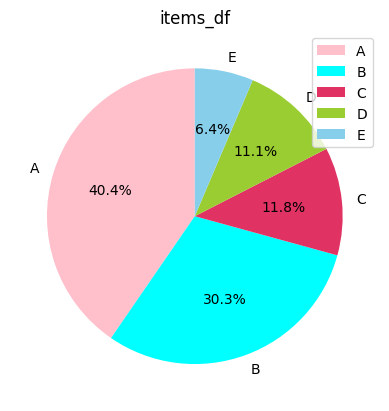

In [ ]:
plt.pie(data,
       labels  = kategori_items,
       colors  = warna,
       autopct = '%1.1f%%',
       startangle=90
       )

plt.legend()
plt.title ('items_df')

plt.show()

In [ ]:
df_reviews.describe()

,itemId,rating,originalRating,likeCount,upVotes,downVotes,relevanceScore
count,2.037870e+05,203787.000000,8.0,203787.000000,203787.000000,203787.000000,203787.000000
mean,2.836479e+08,4.603238,1.0,0.668634,0.668634,0.164638,25.097394
std,1.726207e+08,0.991164,0.0,12.192433,12.192433,2.013273,9.602434
min,6.068000e+03,1.000000,1.0,-1.000000,-1.000000,0.000000,0.960000
25%,1.600086e+08,5.000000,1.0,0.000000,0.000000,0.000000,18.010000
50%,3.541160e+08,5.000000,1.0,0.000000,0.000000,0.000000,23.510000
75%,4.147421e+08,5.000000,1.0,0.000000,0.000000,0.000000,29.670000
max,7.242170e+08,5.000000,1.0,1776.000000,1776.000000,111.000000,76.500000


In [ ]:
df_items.category.value_counts()

beli-harddisk-eksternal    4422
jual-flash-drives          3318
beli-smart-tv              1290
shop-televisi-digital      1211
beli-laptop                 701
Name: category, dtype: int64

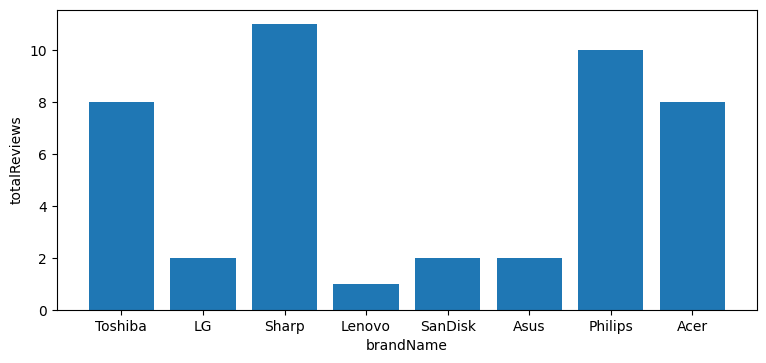

In [ ]:
df_items = df_items.head(10)

fig = plt.figure(figsize=(7,3))
ax  = fig.add_axes([0,0,1,1])
ax.set_xlabel('brandName')
ax.set_ylabel('totalReviews')

ax.bar(df_items['brandName'],df_items['totalReviews'])
plt.show()

<ipython-input-17-4b4f63277663>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_items = df_items.groupby('brandName').sum()['averageRating'].reset_index()


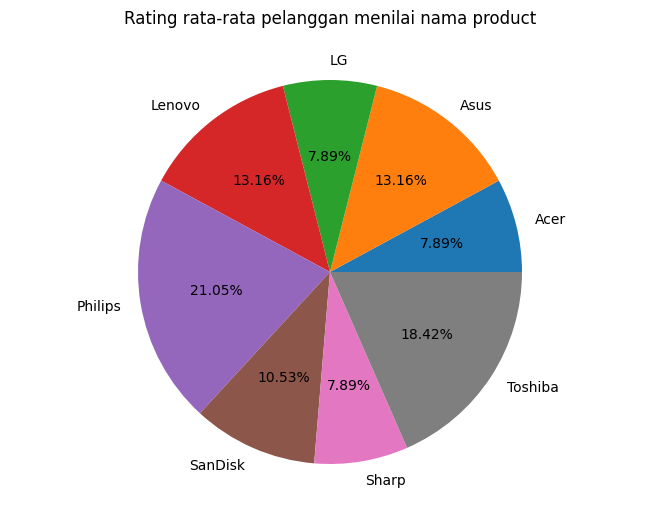

In [ ]:
df_items = df_items.groupby('brandName').sum()['averageRating'].reset_index()
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.set_title(label= 'Rating rata-rata pelanggan menilai nama product')
ax.pie(df_items['averageRating'],labels = df_items['brandName'],autopct='%1.2f%%')
plt.show()

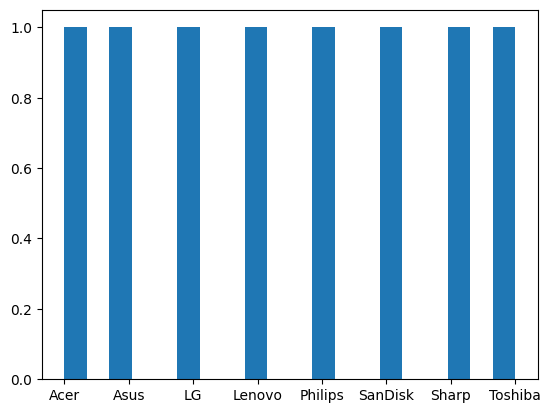

In [ ]:
plt.hist(df_items['brandName'].dropna(), bins=20)
plt.show()

In [ ]:
df_reviews.columns

Index(['itemId', 'category', 'name', 'rating', 'originalRating', 'reviewTitle',
       'reviewContent', 'likeCount', 'upVotes', 'downVotes', 'helpful',
       'relevanceScore', 'boughtDate', 'clientType', 'retrievedDate'],
      dtype='object')

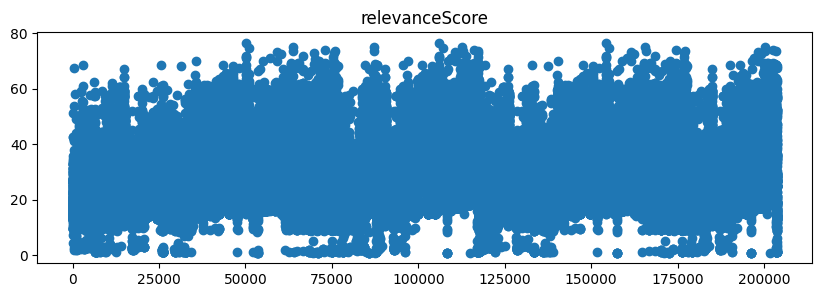

In [ ]:
cat = ['relevanceScore']

for col in cat:
  plt.figure(figsize=(10,3))
  plt.scatter(df_reviews.index,df_reviews[col])
  plt.title(col)
  plt.show()

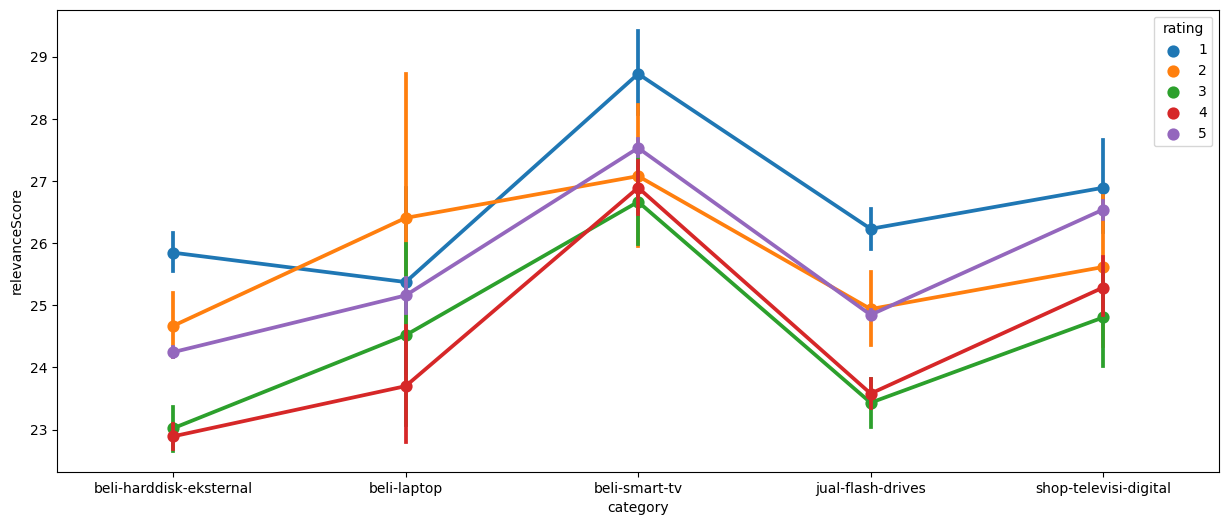

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x="category", y="relevanceScore", hue="rating", data=df_reviews)
plt.show()

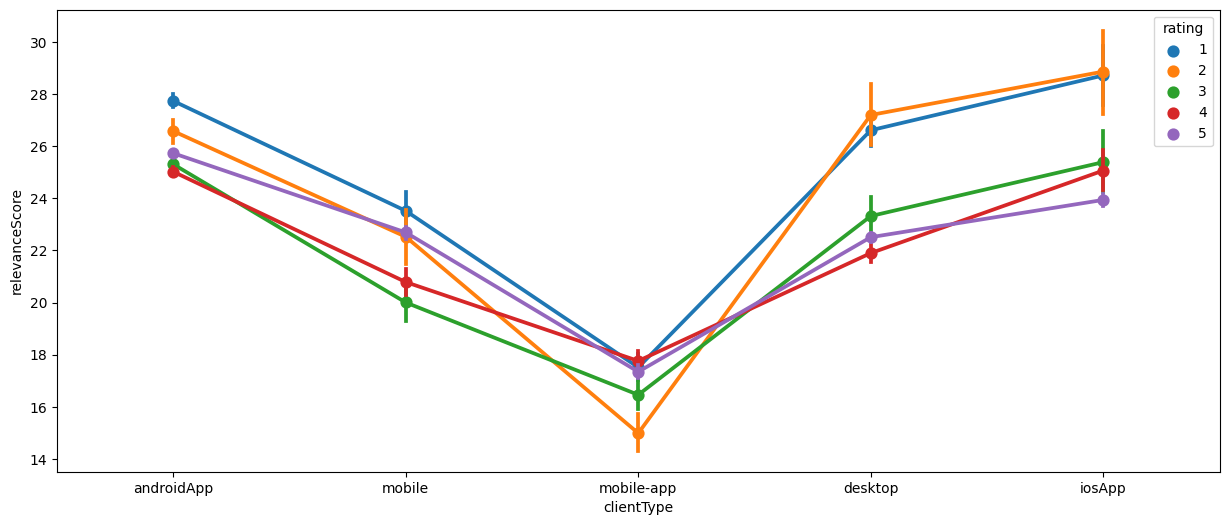

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x="clientType", y="relevanceScore", hue="rating", data=df_reviews)
plt.show()